# Pixel vs Histogram

This notebook shows the consequences of the different features to compare images with. 

In [1]:
#### SETUP STUFF ####

# Imports
import os
import glob
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from knn_classifier import kNearestNeighbor

from util import time_function, extract_hist, image_to_feature_vector, convert_label_to_number
from util import cross_val, print_info, plot_image_samples, multiband_threshold, smooth

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (128, 128) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def compute_dists(a, b):
    """
    Computes the distance betwenn vector a and b
    """
    
    dist = np.sqrt(np.sum( (b - a)**2))

    return dist

## Comparing images from same class

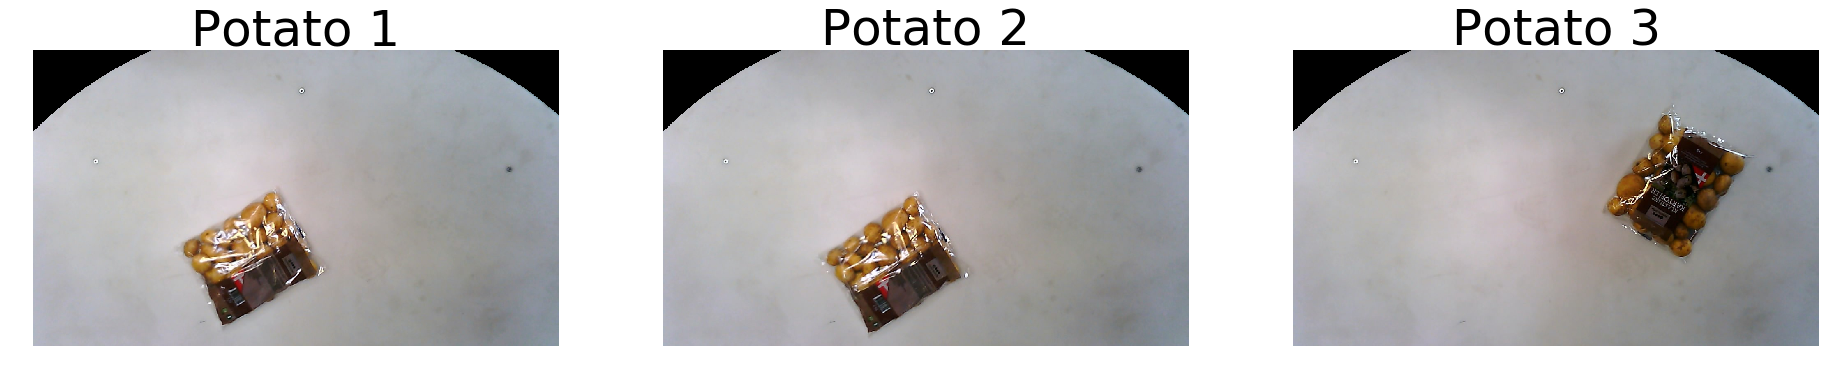

In [3]:
# Import background mask
bgd_mask = cv2.imread('bgd_mask.jpg', cv2.IMREAD_COLOR)

# Import images
potatos = []
potatos.append(cv2.imread('potato1.jpg', cv2.IMREAD_COLOR))
potatos.append(cv2.imread('potato2.jpg', cv2.IMREAD_COLOR))
potatos.append(cv2.imread('potato3.jpg', cv2.IMREAD_COLOR))

# Remove unnessary background
potatos = [cv2.bitwise_and(img, bgd_mask) for img in potatos]

# Plot images
plt.figure(figsize=(32, 32))
for i, potato in enumerate(potatos):
    plt.subplot(1, 3, (i+1))
    plt.imshow(cv2.cvtColor(potato, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Potato ' + str(i+1), fontsize='50')
plt.show()

### Comparing images by pixels

In [4]:
# Resize the images
# size=(128, 128)
# potatos = [cv2.resize(img, size) for img in potatos]

# Flatten the images to big vectors
pixels = [img.flatten() for img in potatos]

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 2:', compute_dists(pixels[0], pixels[1]))

# Computer distance between potato 1 and 3
print('\nDistance between potato 1 and 3:', compute_dists(pixels[0], pixels[2]))


Distance between potato 1 and 2: 10380.875589274732

Distance between potato 1 and 3: 17037.954982919753


### Comparing images by histogram

In [5]:
# Extract histogram of each image
hists = [extract_hist(img, bins=(256, 256, 256)) for img in potatos]

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 2:', compute_dists(hists[0], hists[1]))

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 3:', compute_dists(hists[0], hists[2]))


Distance between potato 1 and 2: 0.34443617

Distance between potato 1 and 3: 0.45924276


## Comparing Potato image with Cat food sal images

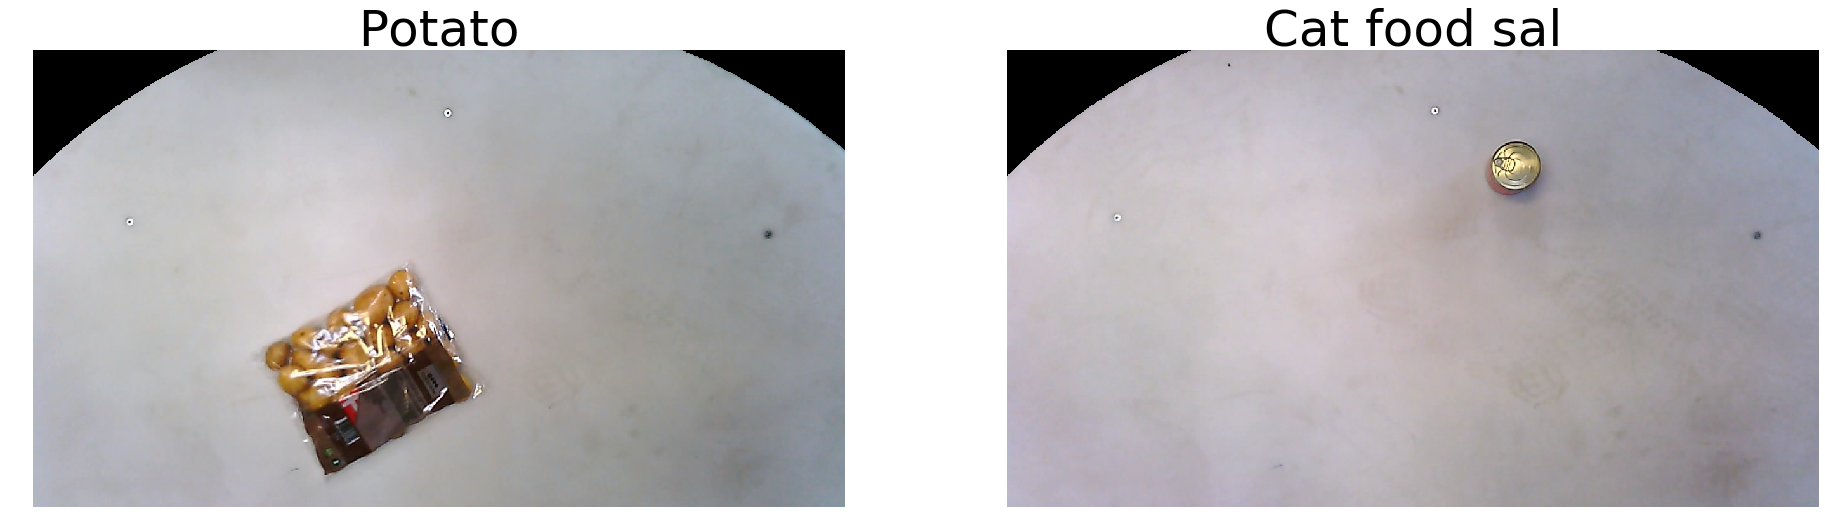

In [6]:
# Load image
potato = cv2.imread('potato1.jpg', cv2.IMREAD_COLOR)
cat_sal = cv2.imread('cat_food_sal.jpg', cv2.IMREAD_COLOR)

# Remove unnessary background
potato = cv2.bitwise_and(potato, bgd_mask)
cat_sal = cv2.bitwise_and(cat_sal, bgd_mask)

# Plot images
plt.figure(figsize=(32, 32))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(potato, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Potato', fontsize='50')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cat_sal, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Cat food sal', fontsize='50')

plt.show()

In [7]:
# Resize the images
# size=(128, 128)
# potatos = [cv2.resize(img, size) for img in potatos]

# Flatten the images to big vectors
potato_pixels = potato.flatten()
cat_sal_pixels = cat_sal.flatten()

# Compute distance between potato and Cat food sal
print('\nDistance between potato and Cat food sal:', compute_dists(potato_pixels, cat_sal_pixels))


Distance between potato and Cat food sal: 11029.747458577644


In [8]:
# Extract histogram of each image
potato_hist = extract_hist(potato, bins=(256, 256, 256))
cat_sal_hist = extract_hist(cat_sal, bins=(256, 256, 256))

# Compute distance between potato and Cat food sal
print('\nDistance between potato and Cat food sal:', compute_dists(potato_hist, cat_sal_hist))


Distance between potato and Cat food sal: 0.55705
